## Simple Linear Regression

dataset: https://icarus.cs.weber.edu/~hvalle/cs4580/data/FuelConsumptionCo2.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# Select some features to explore 
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
5,6,3.5,230,10.0
6,6,3.5,232,10.1
7,6,3.7,255,11.1
8,6,3.7,267,11.6


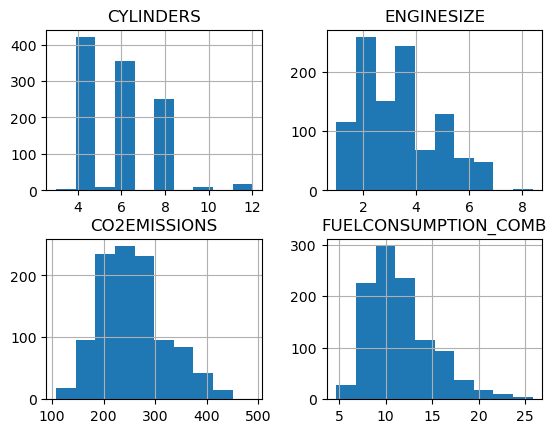

In [7]:
# Plot each feature 
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

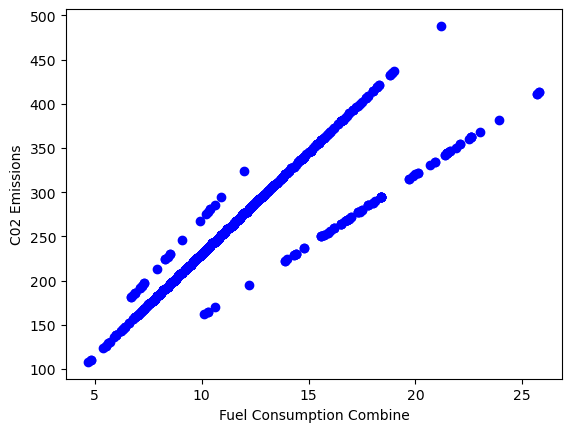

In [12]:
# Plot these features versus Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Combine')
plt.ylabel('C02 Emissions')
plt.show()

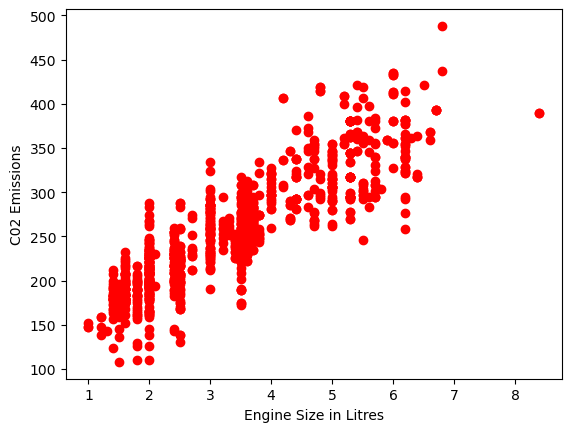

In [14]:
# Plt the engine size against the emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size in Litres')
plt.ylabel('C02 Emissions')
plt.show()

### Create train and test dataset
Create two sets that are mutually exclusive. After which you will train your engine with the train set, and test it with the test set.

In [16]:
# Split the data into training and testing sets
msk = np.random.rand(len(df)) < 0.8 # 80% of the data will be used for training
train = cdf[msk] # 80% of the data will be used for training
test = cdf[~msk] # 20% of the data will be used for testing

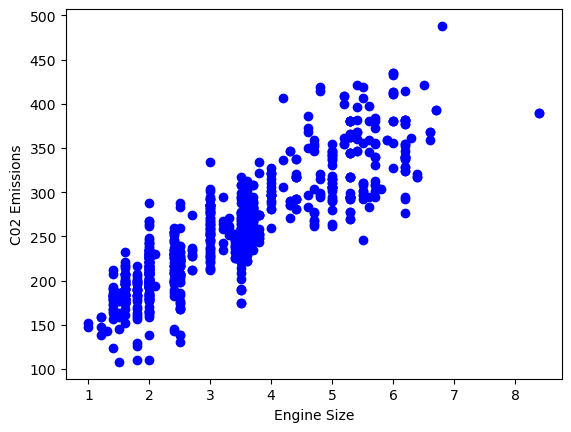

In [18]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('C02 Emissions')
plt.show()

In [ ]:
# Model your Linear Regression on your train set 
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']]) # Has to be a 2D array
train_y = np.asarray(train[['CO2EMISSIONS']]) # Has to be a 2D array
regr.fit(train_x, train_y) # fit the model
print(f'Coefficients: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficients: [[39.05979779]]
Intercept: [125.21825075]


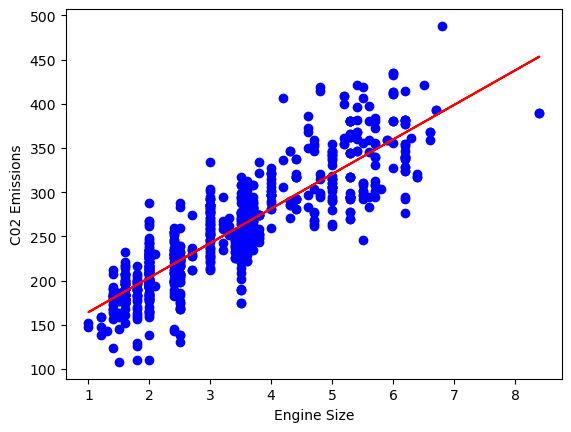

In [28]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('C02 Emissions')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.show()

In [31]:
# Do the evaluation:
# Get the mean absolute error, residual Square Error, R-Squared
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_hat - test_y))}')
print(f'MSE: {np.mean((test_y_hat - test_y) ** 2)}')
print(f'R2-Score: {r2_score(test_y_hat, test_y)}')

Mean Absolute Error: 23.656695574615345
MSE: 1011.1546693895574
R2-Score: 0.664770010096662
